In [9]:
#importing dependencies
from keras.models import load_model
from PIL import ImageGrab, Image
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
from tkinter import filedialog
from tkinter import *
import tkinter as tk
import numpy as np
import cv2

1/1 [==============================] - 0s 113ms/step
[2.0294099e-21 6.0644781e-14 4.4406071e-15 6.1175075e-12 1.1256706e-12
 9.1343044e-28 1.3667260e-18 9.3586371e-18 4.0808018e-06 8.2791330e-16
 7.1403937e-20 7.8628010e-19 1.1356196e-14 1.9245131e-25 3.1728287e-10
 3.5103534e-25 5.2620142e-24 1.7745938e-12 1.8876158e-08 1.7209224e-25
 1.0387422e-09 3.0930244e-24 5.7925328e-28 4.8619544e-21 1.3709406e-17
 5.3838640e-08 3.0797094e-16 1.6128891e-15 1.4088578e-18 4.0908404e-26
 3.7482301e-10 3.5921133e-13 4.8722315e-17 9.9999595e-01 1.5269958e-21
 6.4620771e-31 1.3693994e-16 1.4825050e-16 2.8095651e-18 5.8426592e-15
 2.6671010e-13 3.3689474e-28 2.5413469e-13 1.8298338e-22 1.6990952e-11
 1.5803104e-17]
character_7_chha


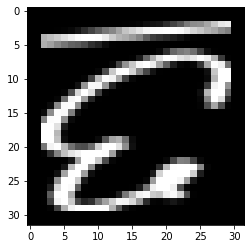

In [19]:
#loading ML model
model = load_model('Models/model.h5')

#defining classes of outputs
classes = ['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

#defining main window
root = Tk()

root.geometry("600x300")
root.title("Devnagri Lipi Handwritten Recognition")

frame = LabelFrame(root, padx = 20, pady = 20, bg = "black")
frame.pack(padx = 20, pady = 20)

img = Image.open('bg.jpg')
image = img.resize((500, 500), Image.ANTIALIAS)
img = ImageTk.PhotoImage(image)

label = Label(frame, image=img)
label.pack()

#defining image pre-processing function
def prepare_img(filepath):
    img_size = 32
    img_arr = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img_arr, (img_size, img_size))
    return (new_arr.reshape(-1, img_size, img_size, 1))

#defining prediction function
def choose():
    new_window = Toplevel(root)
    new_window.geometry("600x500")
    new_window.title("Choose From Device")
    
    frame = LabelFrame(new_window, padx = 20, pady = 20, bg = "black")
    frame.pack(padx = 20, pady = 20)
    
    root.filename = filedialog.askopenfilename(initialdir = "/users/Aman Jain/PythonCourse/Machine Learning/Devnagri Lipi Handwritten Recognition/data/test", title="Select Images", filetypes = (("PNG", "*.png"),) )
    img = prepare_img(root.filename)
    plt.imshow(img[0], cmap='gray')
    
    p = model.predict(img/255)[0]
    print(p)
    index = np.argmax(p)
    acc = np.max(p)*100
    prediction = classes[index]
    print(prediction)
    
    label1 = Label(frame, text = "----- PREDICTION IS -----", font = ("Times", 30, "bold"),padx = 5, pady = 5, bg="black", fg='white')
    label1.grid(row = 0, column = 0,padx = 20, pady = (30,20))
    
    label2 = Label(frame, text = str(prediction)+ "\n" + str(acc) + "%", font = ("Times", 30, "bold"),padx = 5, pady = 5, bg="black", fg='white')
    label2.grid(row = 1, column = 0,padx = 20, pady = (30,40))
    
    choosefile = Button(frame, text = "Choose Another", padx = 5, pady = 5, borderwidth = 5, bg="black", fg='white', font = ("Times", 30, "bold"), command = choose)
    choosefile.grid(row = 2, column = 0, padx = 20, pady = (40,30))

choosefile = Button(label, text = "Choose From Device", padx = 5, pady = 5, borderwidth = 5, bg="black", fg='white', font = ("Times", 30, "bold"), command = choose)
choosefile.grid(row = 0, column = 0, padx = 20, pady = 40)

root.mainloop()